# 手写数据集分类问题--softmax多分类

In [1]:
import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.layers import Activation, Dense
%matplotlib inline

In [2]:
#导入数据集
import keras.datasets.mnist as mnist
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [3]:
train_image.shape

(60000, 28, 28)

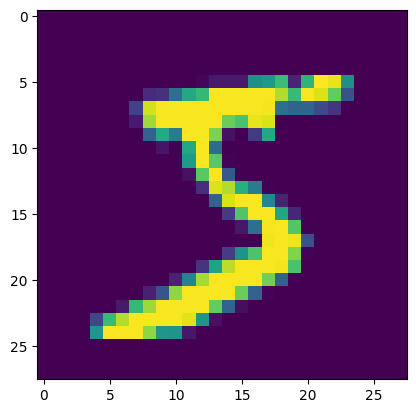

In [4]:
plt.imshow(train_image[0])

In [5]:
train_label.shape

(60000,)

In [6]:
train_label[0]

5

In [7]:
model = keras.Sequential()
##Flatten层用于展平数据，把（28, 28）的数据转化成28*28的数据
model.add(layers.Flatten())
#隐藏层，全连接，输出64个单元，使用relu进行激活
model.add(layers.Dense(64,activation='relu'))
#输出层,多分类问题采用softmax进行输出
model.add(layers.Dense(10,activation='softmax'))

In [8]:
model.compile(optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [9]:
#validation_data=    表示同时对测试集进行验证
model.fit(train_image, train_label, epochs=100, batch_size=20,validation_data=(test_image,test_label) )

Epoch 1/100
3000/3000 [==============================] - 8s 2ms/step - loss: 2.0465 - accuracy: 0.7961 - val_loss: 0.5904 - val_accuracy: 0.8508
Epoch 2/100
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4749 - accuracy: 0.8854 - val_loss: 0.3648 - val_accuracy: 0.9145
Epoch 3/100
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3414 - accuracy: 0.9119 - val_loss: 0.3140 - val_accuracy: 0.9228
Epoch 4/100
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3011 - accuracy: 0.9248 - val_loss: 0.3158 - val_accuracy: 0.9279
Epoch 5/100
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2879 - accuracy: 0.9277 - val_loss: 0.3553 - val_accuracy: 0.9134
Epoch 6/100
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2657 - accuracy: 0.9331 - val_loss: 0.2902 - val_accuracy: 0.9347
Epoch 7/100
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2575 - accuracy: 0.9353 - val_loss: 0.2884 - val_ac

In [10]:
#在测试集上的验证
model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 1.0540 - accuracy: 0.9278


[1.0539827346801758, 0.9277999997138977]

In [11]:
#预测
import numpy as np
model.predict(test_image[:10])

1/1 [==============================] - 0s 167ms/step


array([[0.00000000e+00, 1.43633811e-11, 2.52416200e-26, 1.99119086e-36,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.25444804e-21, 1.00000000e+00, 2.46911904e-16,
        0.00000000e+00, 8.48102776e-32, 1.00330897e-30, 0.00000000e+00,
        3.38844974e-20, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [6.11561298e-01, 2.92840195e-14, 1.59557670e-01, 1.69014484e-02,
        1.11730827e-03, 2.33836528e-02, 8.30438137e-02, 2.91982237e-02,
        5.14433049e-02, 2.37933584e-02],
       [0.00000000e+00, 1.62667028e-28, 1.51044505e-20, 0.00000000e+00,
        1.00000000e+00, 4.46166191e-23, 2.09650475e-32, 1.43609883e-16,
        0.00000000e+00, 2.29531184e-13],
       [0.00000000e+00, 1.00000000e+00, 6.53653269e-38, 0.00000000e+00,
   

In [12]:
np.argmax(model.predict(test_image[:10]),axis=1)

1/1 [==============================] - 0s 24ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)